Conclusão: Não há consenso na determinação de burnout porque os valores variam conforme a população analisada e o contexto em que ela está inserida. Além disso, como não há mapeamento de burnout como doença nas listagens médicas tradicionais (como o CID-10), há receio da comunidade científica em determinar um diagnóstico. 

Proposta: Sendo assim, proponho fazer experimentos para realizar a predição de burnout como classificação utlizando as faixas de resultados das dimensões cinismo, exaustão e eficácia em três variações: (conforme https://www.tandfonline.com/doi/full/10.1080/2331205X.2016.1237605):
Combinação de exaustão (E) e cinismo (C) altas com eficácia no trabalho (T) baixa.
(E) alta e/ou (C) alta.
Escore alto em qualquer uma das três dimensões.
Para determinar um escore alto posso utilizar como critério:
Estar acima da média do escore.
Estar com 1 desvio padrão acima da média do escore (se a distribuição dos escores for gaussiana).
Estar acima do terceiro quartil do intervalo do escore.
Desta forma, o nosso trabalho poderá ser usado para responder às perguntas:

É possível realizar a predição de burnout como um problema de classificação (no contexto da pesquisa do Prof Carlos)? Qual das combinações gera o melhor resultado?

Além disso, como complemento, podemos responder também às perguntas:

Há correlação entre as três dimensões que caracterizam burnout?
Quais são os sumarizadores (MPS, IPPS, IOPS, etc.) que mais contribuem para fazer a predição de burnout?
Quais outros fatores são comuns para indivíduos classificados com burnout positivo (escola, faixa etária, gênero, etc.)?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
na_vals = ['#NULO!']

In [3]:
df = pd.read_csv('Base 5_T1_VV.csv', sep=';', na_values=na_vals, decimal=",")
df2 = pd.read_csv('Base 5_T2_VV_Sem_2.csv', sep=';', na_values=na_vals, decimal=",")

In [4]:
set(df.columns) - set(df2.columns)

set()

In [6]:
# print(df.shape, df2.shape)

(2075, 122) (3509, 122)


In [5]:
df_joined = pd.concat([df, df2])

In [6]:
df_joined.shape

(5584, 122)

In [8]:
# for c in df_joined_cats.columns:
    # print(c)

In [7]:
cat_cols = [idx for idx, val in df_joined.dtypes.items() if val == 'object']

In [8]:
print(cat_cols)

['Código', 'Município', 'escola1', 'Escola_resp_Quest', 'Contrato', 'Outro_qual', 'Porquê_A', 'Quantotempo', 'Porquê_B']


In [9]:
df_joined[cat_cols].describe()

,Código,Município,escola1,Escola_resp_Quest,Contrato,Outro_qual,Porquê_A,Quantotempo,Porquê_B
count,3970,3970,3963,3941,3910,109,127,727,724
unique,2887,16,294,287,11,61,119,115,575
top,GUCA084,Passo Fundo,Instituto Menino Deus,Instituto Menino Deus,1,Temporário,PNEUMONIA,15,Cirurgia.
freq,14,1188,118,117,1759,16,2,50,15


In [58]:
# Porquê_A = "Filho"
# df_joined[df_joined['Porquê_A'].str.contains("Filh", case=False) == True]['Porquê_A']

In [10]:
df_joined.loc[df_joined['Porquê_A'].str.contains("Filh", case=False) == True, 'Porquê_A'] = "Filho"
df_joined.loc[df_joined['Porquê_A'].str.contains("Coluna", case=False) == True, 'Porquê_A'] = "Coluna"
df_joined.loc[df_joined['Porquê_A'].str.contains("Acompanha", case=False) == True, 'Porquê_A'] = "Acompanhamento"
df_joined.loc[df_joined['Porquê_A'].str.contains("Cirurgia", case=False) == True, 'Porquê_A'] = "Cirurgia"
df_joined.loc[df_joined['Porquê_A'].str.contains("Conjuntivite", case=False) == True, 'Porquê_A'] = "Conjuntivite"
df_joined.loc[df_joined['Porquê_A'].str.contains("Consulta", case=False) == True, 'Porquê_A'] = "Consulta"

In [11]:
df_joined.loc[df_joined['Porquê_B'].str.contains("Aborto", case=False) == True, 'Porquê_B'] = "Aborto"
df_joined.loc[df_joined['Porquê_B'].str.contains("Acompanha", case=False) == True, 'Porquê_B'] = "Acompanhamento"
df_joined.loc[df_joined['Porquê_B'].str.contains("Caxumba", case=False) == True, 'Porquê_B'] = "Caxumba"
df_joined.loc[df_joined['Porquê_B'].str.contains("Cirurgia", case=False) == True, 'Porquê_B'] = "Cirurgia"
df_joined.loc[df_joined['Porquê_B'].str.contains("Coluna", case=False) == True, 'Porquê_B'] = "Coluna"
df_joined.loc[df_joined['Porquê_B'].str.contains("Depressão", case=False) == True, 'Porquê_B'] = "Depressão"
df_joined.loc[df_joined['Porquê_B'].str.contains("stress", case=False) == True, 'Porquê_B'] = "Estresse"
df_joined.loc[df_joined['Porquê_B'].str.contains("Filh", case=False) == True, 'Porquê_B'] = "Filho"
df_joined.loc[df_joined['Porquê_B'].str.contains("Fratur", case=False) == True, 'Porquê_B'] = "Fratura"
df_joined.loc[df_joined['Porquê_B'].str.contains("Gripe", case=False) == True, 'Porquê_B'] = "Gripe"
df_joined.loc[df_joined['Porquê_B'].str.contains("Infecção", case=False) == True, 'Porquê_B'] = "Infecção"
df_joined.loc[df_joined['Porquê_B'].str.contains("Labirintite", case=False) == True, 'Porquê_B'] = "Labirintite"
df_joined.loc[df_joined['Porquê_B'].str.contains("Lesão", case=False) == True, 'Porquê_B'] = "Lesão"
df_joined.loc[df_joined['Porquê_B'].str.contains("Licença", case=False) == True, 'Porquê_B'] = "Licença"
df_joined.loc[df_joined['Porquê_B'].str.contains("Virose", case=False) == True, 'Porquê_B'] = "Virose"

In [12]:
df_joined['Porquê_A'].describe()

count       127
unique       83
top       Filho
freq         16
Name: Porquê_A, dtype: object

In [13]:
df_joined['Porquê_B'].describe()

count          724
unique         299
top       Cirurgia
freq           145
Name: Porquê_B, dtype: object

In [14]:
df_joined_cats = df_joined.copy()
df_joined_cats[cat_cols] = df_joined[cat_cols].astype('category')

In [15]:
for cat_col in cat_cols:
    df_joined_cats[cat_col] = df_joined_cats[cat_col].cat.codes

In [16]:
df_joined_cats[cat_cols] = df_joined_cats[cat_cols].replace(-1, np.nan)

In [17]:
# 148 - 95 = 53 colunas com algum valor em branco
# df_joined.dropna(axis=0, how='all').shape
df_joined_cats = df_joined_cats.dropna(axis=0, how='all')

In [18]:
df_joined_cats.shape

(3970, 122)

In [19]:
# df_joined_cats
# df_joined_cats.isnull().sum().sort_values()
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
# sns.heatmap(df_joined_cats.isnull(), cbar=False)
# for c in df_joined_cats.columns:
    # print(c, df_joined_cats[c].isnull().sum())

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

In [20]:
# Dez/2019: classificação
# print(df_joined_cats.Exaustao.describe(), df_joined_cats.Cinismo.describe(), df_joined_cats.SCV.describe())
trab_cols = ['trab'+str(i) for i in range(1, 33)]
atitrab_cols = ['atitrab'+str(i) for i in range(1, 21)]
be_cols = ['be'+str(i) for i in range(1, 20)]
bes_cols = ['bes'+str(i) for i in range(1, 6)]
saude_cols = ['saude'+str(i) for i in range(1, 5)]

df_features = df_joined_cats.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols+['Código'])
df_features.columns

Index(['Município', 'escola1', 'Numero_escolas_trabalha', 'Escola_resp_Quest',
       'Tipo_escola', 'Niveis_escola', 'Idade', 'Sexo', 'Formação',
       'Área_Ed_Inf', 'Área_EF_finais', 'Área_EF_iniciais', 'Área_Ens_Médio',
       'Área_Ens_Téc', 'Contrato', 'Outro_qual', 'Tempo_Escola',
       'Tempo_profissão', 'Hrs_semanais', 'Numero_professores', 'Supervisiona',
       'Licença_2semanas', 'Porquê_A', 'Licença_ano', 'Quantotempo',
       'Porquê_B', 'MPS', 'IPPS', 'IOPS', 'ISP', 'CAFC', 'VSP', 'ARE', 'DED',
       'ARS', 'AED', 'Engagement', 'Exaustao', 'Cinismo', 'SCV', 'Saude'],
      dtype='object')

In [21]:
# df_features.describe() # .isnull().sum().sort_values()

# print(df_features['escola1'])

df_features_pre_processed = df_features.copy()

integer_cols = ['Município', 'escola1', 'Numero_escolas_trabalha', 'Escola_resp_Quest', 
                'Tipo_escola', 'Niveis_escola', 'Idade', 'Sexo', 'Formação',
               'Área_Ed_Inf', 'Área_EF_finais', 'Área_EF_iniciais', 'Área_Ens_Médio',
               'Área_Ens_Téc', 'Contrato', 'Outro_qual', 'Numero_professores', 'Supervisiona',
               'Licença_2semanas', 'Porquê_A', 'Licença_ano', 'Quantotempo', 'Porquê_B',]
float_cols = ['Tempo_Escola', 'Tempo_profissão', 'Hrs_semanais', 'MPS', 'IPPS', 'IOPS', 'ISP', 'CAFC', 'VSP', 'ARE', 'DED',
       'ARS', 'AED', 'Engagement', 'Exaustao', 'Cinismo', 'SCV', 'Saude']

# IGNORED
_IGNORED = -1
ignored_cols = ['escola1', 'Escola_resp_Quest', 'Outro_qual', 'Porquê_A', 'Porquê_B', 'Quantotempo']
for i in ignored_cols:
    df_features_pre_processed[i] = df_features_pre_processed[i].fillna(_IGNORED)

# MODE
mode_cols = ['Numero_escolas_trabalha', 'Tipo_escola', 'Niveis_escola', 'Sexo', 
             'Niveis_escola', 'Formação', 'Área_Ed_Inf', 'Área_EF_finais', 
             'Área_EF_iniciais', 'Área_Ens_Médio', 'Área_Ens_Téc', 'Contrato',
            'Hrs_semanais', 'Supervisiona', 'Licença_2semanas', 'Licença_ano']
for m in mode_cols:
    df_features_pre_processed[m] = df_features_pre_processed[m].fillna(df_features_pre_processed[m].mode().values[0])

# MEAN
mean_cols = ['Idade', 'Tempo_Escola', 'Tempo_profissão', 'Numero_professores', 'IOPS', 'CAFC', 'VSP', 'Saude']
for m in mean_cols:
    df_features_pre_processed[m] = df_features_pre_processed[m].fillna(df_features_pre_processed[m].mean())

df_features_pre_processed[df_features_pre_processed.columns[df_features_pre_processed.isna().any()]].isnull().sum()

# Primeiro a imputação de dados, depois a conversão:
# df_features[integer_cols] = df_features[integer_cols].astype('int')

# for c in df_features.columns:
    # print(c, df_features[c].isnull().sum(), sep=": ")

Series([], dtype: float64)

In [33]:
# -1 para os categóricos
# df_joined_cats[cat_cols] = df_joined_cats[cat_cols].replace(np.nan, -1)

In [158]:
# Média para os demais
# df_joined_cats.isnull().sum().items()
# cols_null = [idx for (idx, val) in df_joined_cats.isnull().sum().items() if val > 0 ]
# for c in cols_null:
    # df_joined_cats[c] = df_joined_cats[c].replace(np.nan, df_joined_cats[c].mean())

# 1. Definir valores NA "#NULO!" (ok)
# 2. Unificar colunas e linhas (ok)
# 3. Converter valores numéricos com vírgula para ponto (ok)
# 4. Transformar valores descritivos em categóricos com códigos (ok)
# 7. Transformar colunas descritivas em categoria (radicais de palavras, centralizar problemas) (ok, manual)
# 5. Dropar colunas/linhas com NA que não irão auxiliar (ok)
# 6. Preencher valores NA de colunas mantidas (ok)
# 8. Implementar predição e medir qualidade (ok)

# 1. Determinar a classificação dos indivíduos 
## 1.1. Com Exaustao e Cinismo abaixo da média e Engagement acima da média
## 1.2. Com Exaustão ou Cinismo altos (abaixo da média)
## 1.3. Com qualquer um dos escores altos
# 2. Aplicar diferentes métodos de classificação
# 3. Aferir a qualidade e realizar comparações
# 4. Plotar gráficos de resultados

In [22]:
_EXA_COL = 'Exaustao'
_CIN_COL = 'Cinismo'
_ENG_COL = 'Engagement'

_MEAN_E = df_features_pre_processed[_EXA_COL].mean()
_MEAN_C = df_features_pre_processed[_CIN_COL].mean()
_MEAN_G = df_features_pre_processed[_ENG_COL].mean()


# Gereric rules
def add_rule(who, rules):
    
    global df_features_pre_processed
    
    if who in df_features_pre_processed.columns:
        df_features_pre_processed.drop(columns=[who], inplace=True)

    where = len(df_features_pre_processed.columns)
    what = df_features_pre_processed.apply(rules, axis=1)
    
    df_features_pre_processed.insert(where, who, what)


# 1.1

burnout_classification_rules = lambda x: x[_EXA_COL] < _MEAN_E and x[_CIN_COL] < _MEAN_C and x[_ENG_COL] > _MEAN_G

add_rule('Burnout', burnout_classification_rules)


# 1.2

burnout_classification_rules = lambda x: x[_EXA_COL] < _MEAN_E or x[_CIN_COL] < _MEAN_C

add_rule('Burnout_EC', burnout_classification_rules)


# 1.3

burnout_classification_rules = lambda x: x[_EXA_COL] < _MEAN_E or x[_CIN_COL] < _MEAN_C or x[_ENG_COL] > _MEAN_G

add_rule('Burnout_ANY', burnout_classification_rules)


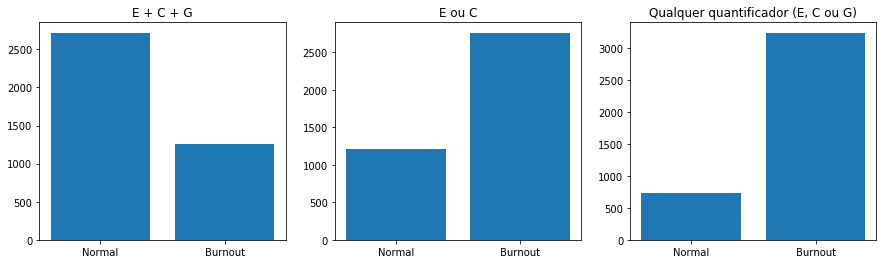

In [31]:

rule1 = df_features_pre_processed.Burnout.value_counts().sort_index()
rule2 = df_features_pre_processed.Burnout_EC.value_counts().sort_index()
rule3 = df_features_pre_processed.Burnout_ANY.value_counts().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].bar(['Normal', 'Burnout'], rule1)
axes[0].set_title('E + C + G')
axes[1].bar(['Normal', 'Burnout'], rule2)
axes[1].set_title('E ou C')
axes[2].bar(['Normal', 'Burnout'], rule3)
axes[2].set_title('Qualquer quantificador (E, C ou G)')
plt.show()

In [28]:
# Dez/2019: classificação
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df_feat_no_class = df_features_pre_processed.drop(columns=['Burnout_EC', 'Burnout_ANY', 'Burnout', _EXA_COL, _CIN_COL, _ENG_COL])

# print(df_feat_no_class)

X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class, 
                                                    df_features_pre_processed.Burnout, test_size=0.2)

clf = SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
y_score = clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Accuracy SVM {0:0.2f}'.format(accuracy_score(y_test, preds)))
print('Average precision-recall score SVM: {0:0.2f}'.format(average_precision))


# DT
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

preds = dtc.predict(X_test)

print('Accuracy DTree {0:0.2f}'.format(accuracy_score(y_test, preds)))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

print('Accuracy RandomForest {0:0.2f}'.format(accuracy_score(y_test.values, preds)))

c:\users\ralph.rassweiler\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy SVM 0.67
Average precision-recall score SVM: 0.36
Accuracy DTree 0.62
Accuracy RandomForest 0.69


c:\users\ralph.rassweiler\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [223]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(df_feat_no_class.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.iloc[:]

,feature,importance
36,SCV,0.079093
37,Saude,0.064842
35,AED,0.055820
6,Idade,0.050866
19,Numero_professores,0.046980
3,Escola_resp_Quest,0.045980
34,ARS,0.044603
17,Tempo_profissão,0.044596
33,DED,0.044584
1,escola1,0.043641


count    3968.000000
mean       36.140578
std        25.953674
min         1.000000
25%        17.000000
50%        30.000000
75%        47.118845
max       187.000000
Name: Numero_professores, dtype: float64


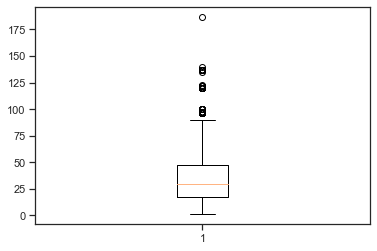

In [201]:
# df_features_pre_processed.sort_values(by=["Numero_professores"]).Numero_professores.head(10)
# df_features_pre_processed.drop([784], inplace=True)
# df_features_pre_processed.loc[784].Numero_professores
print(df_features_pre_processed["Numero_professores"].describe())
plt.boxplot(df_features_pre_processed.Numero_professores)
plt.show()

In [221]:
# df_features_pre_processed["Idade"]
df_features_pre_processed[(df_features_pre_processed["Idade"] > 50.) & (df_features_pre_processed["Idade"] < 84.)].groupby(by=["Burnout"]).count()

,Município,escola1,Numero_escolas_trabalha,Escola_resp_Quest,Tipo_escola,Niveis_escola,Idade,Sexo,Formação,Área_Ed_Inf,...,AED,Engagement,Exaustao,Cinismo,SCV,Saude,Burnout_EC,IdadeCat,Burnout_ANY,NrProfCat
Burnout,,,,,,,,,,,,,,,,,,,,,
False,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,394,394,394,394,394,394
True,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252


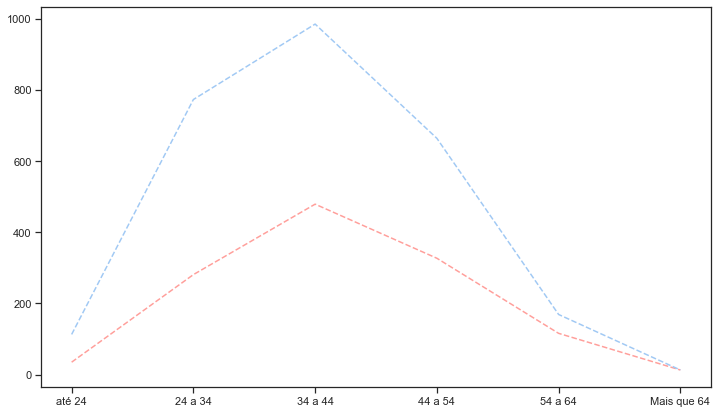

In [202]:
# Executar isso apenas uma vez:
# aaa = pd.cut(df_features_pre_processed.Idade, [0, 24, 34, 44, 54, 64, 100], labels=["até 24", "24 a 34", "34 a 44", "44 a 54", "54 a 64", "Mais que 64"])
# df_features_pre_processed.insert(len(df_features_pre_processed.columns), "IdadeCat", aaa)
# bbb = pd.cut(df_features_pre_processed.Numero_professores, [0, 36, 72, 108, 144, 200], labels=["até 36", "36 a 72", "72 a 108", "108 a 144", "Mais que 144"])
# df_features_pre_processed.insert(len(df_features_pre_processed.columns), "NrProfCat", bbb)

figure(figsize=(12,7))

dfg = df_features_pre_processed[df_features_pre_processed.Burnout==1][["IdadeCat", "Burnout"]].groupby(by=["IdadeCat"]).count()
dfg2 = df_features_pre_processed[df_features_pre_processed.Burnout==0][["IdadeCat", "Burnout"]].groupby(by=["IdadeCat"]).count()

_x_axis = list(dfg.index)

plt.plot(_x_axis, dfg.values, 'r--', _x_axis, dfg2.values, 'b--')
plt.show()

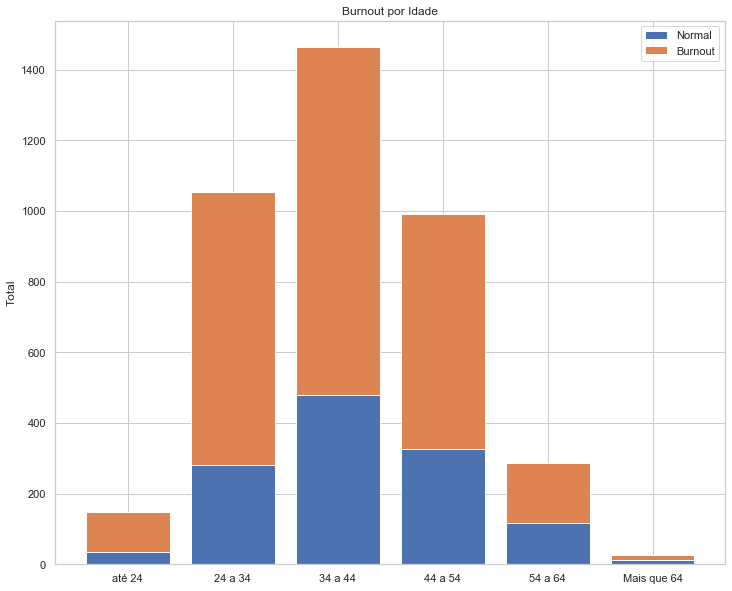

In [151]:
figure(figsize=(12,10))

ind = np.arange(len(_x_axis))
width = 0.35

p1 = plt.bar(ind, dfg.values.ravel())
p2 = plt.bar(ind, dfg2.values.ravel(), bottom=dfg.values.ravel())

plt.ylabel('Total')
plt.title('Burnout por Idade')
plt.xticks(ind, tuple(_x_axis))
plt.yticks()
plt.legend((p1[0], p2[0]), ('Normal', 'Burnout'))

plt.show()

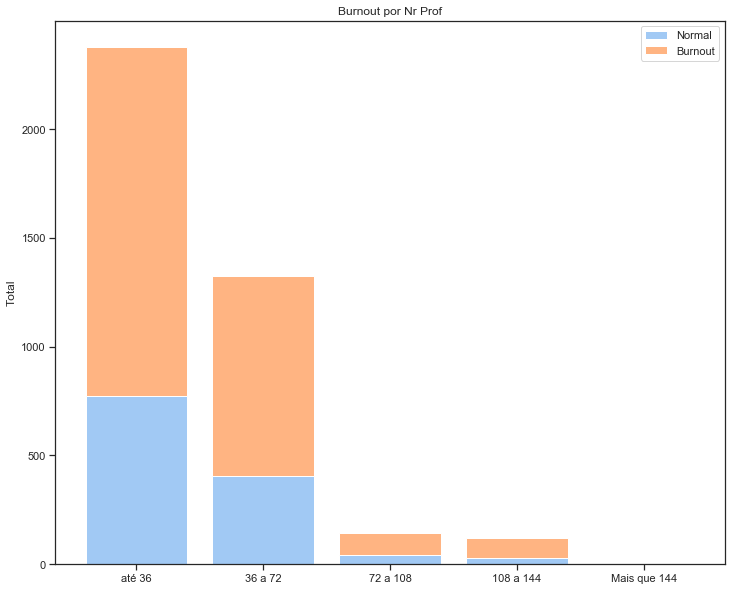

In [203]:
figure(figsize=(12,10))

dfg = df_features_pre_processed[df_features_pre_processed.Burnout==1][["NrProfCat", "Burnout"]].groupby(by=["NrProfCat"]).count()
dfg2 = df_features_pre_processed[df_features_pre_processed.Burnout==0][["NrProfCat", "Burnout"]].groupby(by=["NrProfCat"]).count()

_x_axis = list(dfg.index)

ind = np.arange(len(_x_axis))
width = 0.35

p1 = plt.bar(ind, dfg.values.ravel())
p2 = plt.bar(ind, dfg2.values.ravel(), bottom=dfg.values.ravel())

plt.ylabel('Total')
plt.title('Burnout por Nr Prof')
plt.xticks(ind, tuple(_x_axis))
plt.yticks()
plt.legend((p1[0], p2[0]), ('Normal', 'Burnout'))

plt.show()

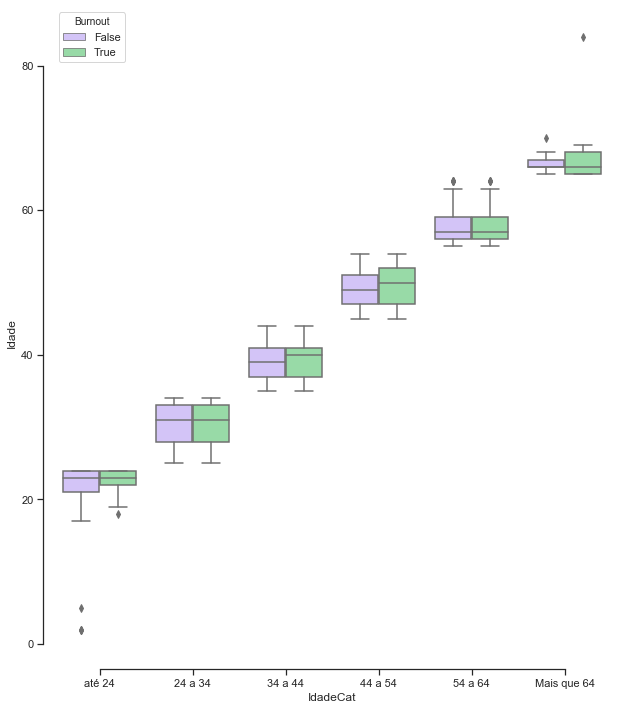

In [166]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="IdadeCat", y="Idade",
            hue="Burnout", palette=["m", "g"],
            data=df_features_pre_processed)
sns.despine(offset=10, trim=True)

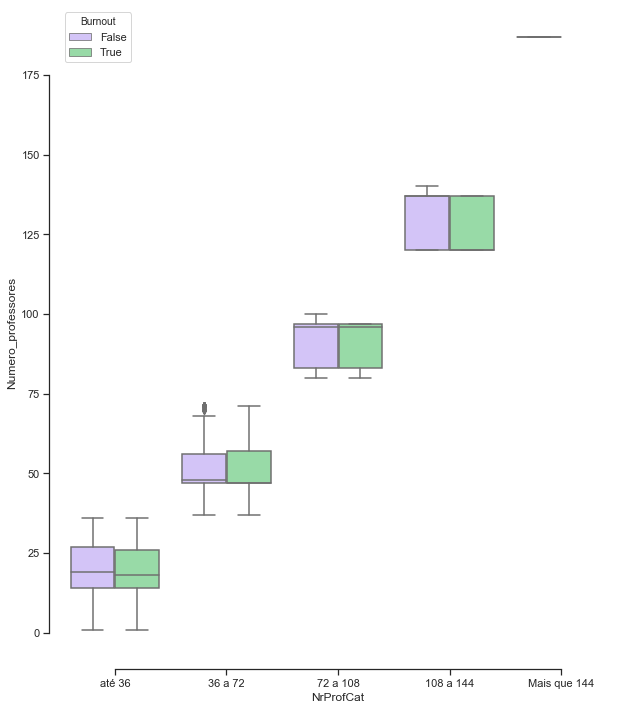

In [204]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="NrProfCat", y="Numero_professores",
            hue="Burnout", palette=["m", "g"],
            data=df_features_pre_processed)
sns.despine(offset=10, trim=True)

In [ ]:
p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test.values, preds)

array([[486,  51],
       [196,  61]], dtype=int64)

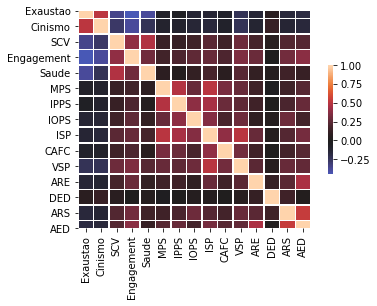

In [39]:
# Dez/2019: classificação

x = df_joined_cats.iloc[0]
# x.Exaustao * x.Cinismo * x.SCV
corr = df_joined_cats[['Exaustao', 'Cinismo', 'SCV'] + ['Engagement', 'Saude', 'MPS', 'IPPS', 'IOPS', 'ISP', 'CAFC', 'VSP', 'ARE', 'DED', 'ARS', 'AED']].corr()
# print(corr)
sns.heatmap(corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# O melhor método para fazer a predição de Burnout dentre as hipóteses levantadas parece ser a combinação de Engagement, Cinismo e Exaustao porque gera uma população de cerca de 35% com Burnout.
# SCV, Saude e AED são os três preditores mais fortes de Burnout. Em seguida temos Idade e Numero de Professores na Escola.
# Há uma correlação alta entre os três preditores fortes e Engagement.
# Random Forest prediz Burnout com uma acurácia média de 71%.